Epsilon=
    [a] 0.35      
    [b] 0.35      
    [c] 0.35      
Max iterācijas=
    [a] 1000      
    [b] 1000      
    [c] 1000      
Soļa lielums=
    [a] 0.01      
    [b] 0.01      
    [c] 0.01      

Sākotnējā x1, x2, x3 vērtības:
    [a] [0. 0. 0.]
    [b] [0.1 0.2 0.3]
    [c] [ 0.2 -0.4  0.1]
Sākotnējā vērtība f(x):
    [a] 1.0
    [b] 2.482468643406571
    [c] 0.321249361281693
Optimuma x1, x2, x3 vērtības:
    [a] [-0.7157643  -1.25214692 -0.13906513]
    [b] [-0.71416723 -1.257286   -0.13321872]
    [c] [-0.71275584 -1.25561391 -0.13527141]
Funkcijas vērtība optimumā:
    [a] -8.218204108283846
    [b] -8.241951832602547
    [c] -8.22932078628619
Iterāciju skaits:
    [a] 111
    [b] 123
    [c] 52


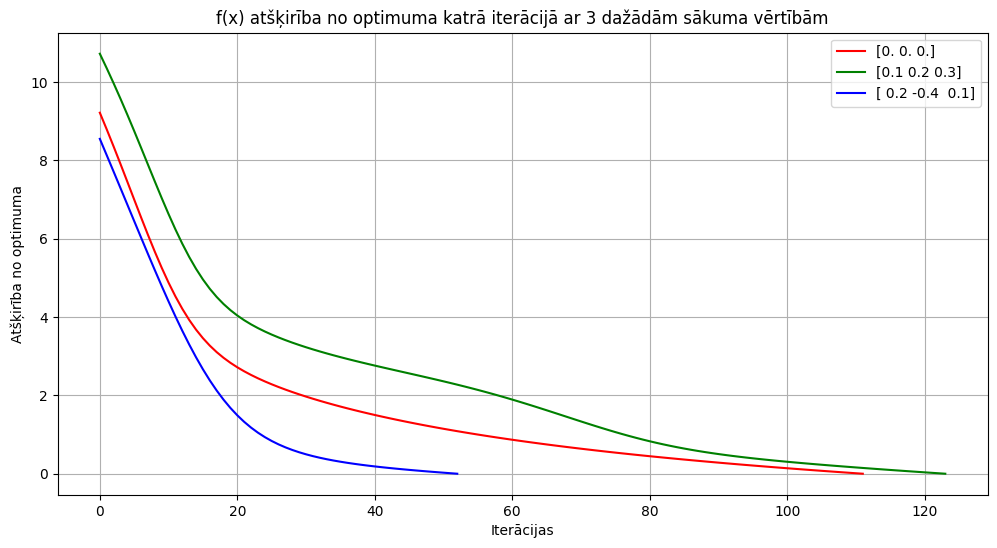

In [31]:
# Gradienta metodes izmantošana minimizācijai

import numpy as np
import matplotlib.pyplot as plt

# 05 varianta konstantes
a=2
b=2
c=2
d=4
l=5
k=-4

# definejam funkciju f(x)
def f(x):
    return (a*x[0]**4) - (b*x[0]*x[2]**2) + (c*x[1]**2*x[2]**2) - (d*x[2]**3) + (l*x[0]) - (k*x[1]) + np.exp(x[2]) - np.log(x[0]**2+x[1]**2+1)

# definejam gradientu
def grad_f(x):
    return np.array([
        -(2*x[0])/(x[0]**2+x[2]**2+1)+8*x[0]**3-2*x[1]**2+5,
        4*x[2]**2*x[1]-4*x[0]*x[1]+4,
        np.exp(x[2])-(2*x[2])/(x[2]**2+x[0]**2+1)-12*x[2]**2+4*x[1]**2*x[2]
    ])


def gradient(x_init, step_size, epsilon, max_iterations, f, grad_f):
    x = x_init
    iteration_values = []
    for i in range(max_iterations):
        gradient = -grad_f(x) # negativs, jo minimize
        iteration_values.append((i, x.copy(), f(x), gradient.copy()))

        if np.linalg.norm(gradient) <= epsilon:
            return iteration_values
        
        x = x + step_size * gradient

    return iteration_values


a_epsilon=0.35
a_max_iterations=1000
a_step_size=0.01
a_x_init=np.array([0.0, 0.0, 0.0])
a_iteration_values_verbose = gradient(
    x_init=a_x_init,
    epsilon=a_epsilon,
    max_iterations=a_max_iterations,
    f=f,
    grad_f=grad_f,
    step_size=a_step_size
)

b_epsilon=0.35
b_max_iterations=1000
b_step_size=0.01
b_x_init=np.array([0.1, 0.2, 0.3])
b_iteration_values_verbose = gradient(
    x_init=b_x_init,
    epsilon=b_epsilon,
    max_iterations=b_max_iterations,
    f=f,
    grad_f=grad_f,
    step_size=b_step_size
)

c_epsilon=0.35
c_max_iterations=1000
c_step_size=0.01
c_x_init=np.array([0.2, -0.4, 0.1])
c_iteration_values_verbose = gradient(
    x_init=c_x_init,
    epsilon=c_epsilon,
    max_iterations=c_max_iterations,
    f=f,
    grad_f=grad_f,
    step_size=c_step_size
)


print(f"Epsilon=\n    [a] {a_epsilon:<10}\n    [b] {b_epsilon:<10}\n    [c] {c_epsilon:<10}")
print(f"Max iterācijas=\n    [a] {a_max_iterations:<10}\n    [b] {b_max_iterations:<10}\n    [c] {c_max_iterations:<10}")
print(f"Soļa lielums=\n    [a] {a_step_size:<10}\n    [b] {b_step_size:<10}\n    [c] {c_step_size:<10}\n")
print(f"Sākotnējā x1, x2, x3 vērtības:\n    [a] {a_iteration_values_verbose[0][1]}\n    [b] {b_iteration_values_verbose[0][1]}\n    [c] {c_iteration_values_verbose[0][1]}")
print(f"Sākotnējā vērtība f(x):\n    [a] {a_iteration_values_verbose[0][2]}\n    [b] {b_iteration_values_verbose[0][2]}\n    [c] {c_iteration_values_verbose[0][2]}")
print(f"Optimuma x1, x2, x3 vērtības:\n    [a] {a_iteration_values_verbose[-1][1]}\n    [b] {b_iteration_values_verbose[-1][1]}\n    [c] {c_iteration_values_verbose[-1][1]}")
print(f"Funkcijas vērtība optimumā:\n    [a] {a_iteration_values_verbose[-1][2]}\n    [b] {b_iteration_values_verbose[-1][2]}\n    [c] {c_iteration_values_verbose[-1][2]}")
print(f"Iterāciju skaits:\n    [a] {a_iteration_values_verbose[-1][0]}\n    [b] {b_iteration_values_verbose[-1][0]}\n    [c] {c_iteration_values_verbose[-1][0]}")


a_iterations = [iteration[0] for iteration in a_iteration_values_verbose]
a_f_values = [iteration[2] for iteration in a_iteration_values_verbose]
a_diff = [iteration[2]-a_iteration_values_verbose[-1][2] for iteration in a_iteration_values_verbose]

b_iterations = [iteration[0] for iteration in b_iteration_values_verbose]
b_f_values = [iteration[2] for iteration in b_iteration_values_verbose]
b_diff = [iteration[2]-b_iteration_values_verbose[-1][2] for iteration in b_iteration_values_verbose]

c_iterations = [iteration[0] for iteration in c_iteration_values_verbose]
c_f_values = [iteration[2] for iteration in c_iteration_values_verbose]
c_diff = [iteration[2]-c_iteration_values_verbose[-1][2] for iteration in c_iteration_values_verbose]


# Funkcijas vērtības atšķirība no optimuma katrā iterācijā
plt.figure(figsize=(12, 6))
plt.plot(a_iterations, a_diff, color='red', label=a_iteration_values_verbose[0][1])
plt.plot(b_iterations, b_diff, color='green', label=b_iteration_values_verbose[0][1])
plt.plot(c_iterations, c_diff, color='blue', label=c_iteration_values_verbose[0][1])
plt.title('f(x) atšķirība no optimuma katrā iterācijā ar 3 dažādām sākuma vērtībām')
plt.xlabel('Iterācijas')
plt.ylabel('Atšķirība no optimuma')
plt.grid(True)
plt.legend()
plt.show()

a
Iegūtais minimums: -5.953399807581772
Minimuma atrašanās vieta: [ 0.71740203 -0.01324909 -1.01235618]
Iterāciju skaits: 102
Minimizēšana veiksmīga: True

b
Iegūtais minimums: -5.953727539683678
Minimuma atrašanās vieta: [ 7.20759182e-01  2.80525996e-05 -1.01159946e+00]
Iterāciju skaits: 153
Minimizēšana veiksmīga: True

c
Iegūtais minimums: -5.953727537340108
Minimuma atrašanās vieta: [ 7.20779467e-01  4.15843860e-06 -1.01160783e+00]
Iterāciju skaits: 124
Minimizēšana veiksmīga: True


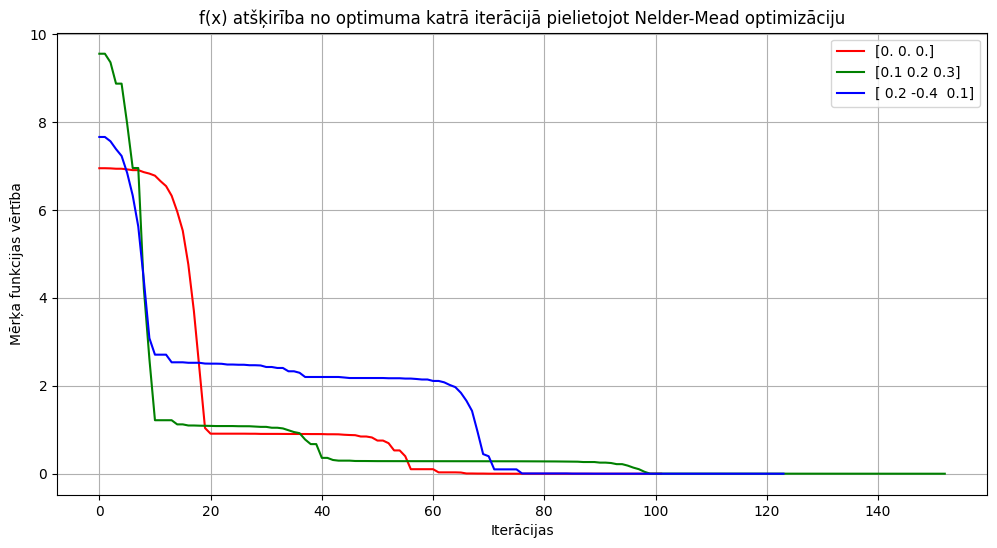

In [32]:
# Nelder-Mead algoritma (no SciPY bibliotēkas) izmantošana minimizācijai

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# 05 varianta konstantes
a=2
b=2
c=2
d=4
l=5
k=-4

# definejam merka funkciju
def f(x):
    x1, x2, x3 = x
    return (a*x1**4) - (b*x1*x3**2) + (c*x2**2*x3**2) - (d*x3**3) + (l*x3) - (k*x3) + np.exp(x3) - np.log(x1**2+x2**2+1)

# sakuma punkti
a_x0 = np.array([0.0, 0.0, 0.0])
b_x0 = np.array([0.1, 0.2, 0.3])
c_x0 = np.array([0.2, -0.4, 0.1])

function_values = []
def callback(x): # atgriez vertibu katra iteracija
    function_values.append(f(x))


epsilon=0.0001 #default 1e-4 (0.0001)

#a
NelderMead_result = minimize(f, a_x0, method='Nelder-Mead', callback=callback, options={'xatol': epsilon, 'fatol': epsilon})
a_iterations = range(len(function_values))
a_diff = [a_iterations-function_values[-1] for a_iterations in function_values]
print(f"a\nIegūtais minimums: {NelderMead_result.fun}\nMinimuma atrašanās vieta: {NelderMead_result.x}\nIterāciju skaits: {NelderMead_result.nit}\nMinimizēšana veiksmīga: {NelderMead_result.success}")
function_values = []
#b
NelderMead_result = minimize(f, b_x0, method='Nelder-Mead', callback=callback, options={'xatol': epsilon, 'fatol': epsilon})
b_iterations = range(len(function_values))
b_diff = [b_iterations-function_values[-1] for b_iterations in function_values]
print(f"\nb\nIegūtais minimums: {NelderMead_result.fun}\nMinimuma atrašanās vieta: {NelderMead_result.x}\nIterāciju skaits: {NelderMead_result.nit}\nMinimizēšana veiksmīga: {NelderMead_result.success}")
function_values = []
#c
NelderMead_result = minimize(f, c_x0, method='Nelder-Mead', callback=callback, options={'xatol': epsilon, 'fatol': epsilon})
c_iterations = range(len(function_values))
c_diff = [c_iterations-function_values[-1] for c_iterations in function_values]
print(f"\nc\nIegūtais minimums: {NelderMead_result.fun}\nMinimuma atrašanās vieta: {NelderMead_result.x}\nIterāciju skaits: {NelderMead_result.nit}\nMinimizēšana veiksmīga: {NelderMead_result.success}")
function_values = []


plt.figure(figsize=(12, 6))
plt.plot(a_iterations, a_diff, color='red', label=a_x0)
plt.plot(b_iterations, b_diff, color='green', label=b_x0)
plt.plot(c_iterations, c_diff, color='blue', label=c_x0)
plt.title('f(x) atšķirība no optimuma katrā iterācijā pielietojot Nelder-Mead optimizāciju')
plt.xlabel('Iterācijas')
plt.ylabel('Mērķa funkcijas vērtība')
plt.grid(True)
plt.legend()
plt.show()